<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - Force specific parameters optical processes at EODC
## On-demand CARD4L processing of Sentinel-2 data with specific propriatory parameters

This notebook shows how to use EODC's propriatory ARD parameters which allow to customize the ARD generation.

The ard_surface_reflectance process as well as the atmospheric_correction process can be applied with specific options as parameters.

In [21]:
from eo_utils import *

## Step 1 -  Area of Interest selection
### Run the next cell, click on the rectangle button and then draw the area over the map like in the following example image
<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/selection_bbox.jpg"
     alt="rectangle_selection"
     style="float: left; margin-right: 10px;" />

In [2]:
center = [46.49, 11.35]
zoom = 12

eoMap = openeoMap(center,zoom)
addS2Tiles(eoMap)
eoMap.map

Map(center=[46.49, 11.35], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

1. Get the bounding box from the previous map. 

In [3]:
bbox = eoMap.getBbox()
print('west',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])

west 11.08348846435547 
east 11.616325378417969 
south 46.44258864468262 
north 46.53713734839792


2. Or define values for the bounding box.

In [22]:
west = 11.279182434082033
east = 11.406898498535158
north = 46.522729291844286
south = 46.464349400461145

print('west',west,'\neast',east,'\nsouth',south,'\nnorth',north)

west 11.279182434082033 
east 11.406898498535158 
south 46.464349400461145 
north 46.522729291844286


<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Sentinel_1.jpg"
     alt="Sentinel-1"
     style="float: left; margin-right: 10px; width:100px" />
## Step 2 - openEO graph creation for CARD4L ARD Sentinel-2 

1. Open the connection with openEO back-end. Please use the openeo-auth tool to configure credentials.
https://open-eo.github.io/openeo-python-client/auth.html#config-files-and-openeo-auth-helper-tool

In [ ]:
username = 
password = 

In [ ]:
eodc_backend = "https://openeo.eodc.eu/v1.0"
con_eodc = openeo.connect(eodc_backend).authenticate_basic(username, password)

In [24]:
con_eodc.describe_collection('s2a_prd_msil1c')

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B10',
    'B11',
    'B12']},
  't': {'extent': ['2015-06-27T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x', 'extent': [-180, 180], 'type': 'spatial'},
  'y': {'axis': 'y', 'extent': [-90, 90], 'type': 'spatial'}},
 'deprecated': False,
 'description': 'Sentinel-2 is a multispectral, high-resolution, optical imaging mission, developed by the European Space Agency (ESA) in the frame of the Copernicus program of the European Commission.',
 'extent': {'spatial': {'bbox': [[-180.0, -90.0, 180.0, 90.0]]},
  'temporal': {'interval': [[None, None]]}},
 'id': 's2a_prd_msil1c',
 'keywords': ['Sentinel-2',
  'Sentinel-2A',
  'Level-1',
  'Satellite',
  'Remote Sensing',
  'Copernicus',
  'Orthoimagery',
  's2a_prd_msil1c',
  'EODC',
  'imageryBaseMapsEarthCover'],
 'license': 'no conditions apply',
 'links': [{'href': 'https://openeo.eodc.eu/v1.0/collections/s2a_prd_msil1c',
   'rel': 'self'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections', 'rel': 'parent'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections', 'rel': 'root'}],
 'stac_extensions': ['datacube', 'eo'],
 'stac_version': '0.9.0',
 'summaries': {'constellation': ['sentinel-2'],
  'eo:bands': [{'center_wavelength': 0.4427,
    'common_name': 'coastal',
    'full_width_half_max': 0.021,
    'gsd': 60,
    'name': 'B01'},
   {'center_wavelength': 0.4924,
    'common_name': 'blue',
    'full_width_half_max': 0.066,
    'gsd': 10,
    'name': 'B02'},
   {'center_wavelength': 0.5598,
    'common_name': 'green',
    'full_width_half_max': 0.036,
    'gsd': 10,
    'name': 'B03'},
   {'center_wavelength': 0.6646,
    'common_name': 'red',
    'full_width_half_max': 0.031,
    'gsd': 10,
    'name': 'B04'},
   {'center_wavelength': 0.7041,
    'common_name': 'rededge',
    'full_width_half_max': 0.015,
    'gsd': 20,
    'name': 'B05'},
   {'center_wavelength': 0.7405,
    'common_name': 'rededge',
    'full_width_half_max': 0.015,
    'gsd': 20,
    'name': 'B06'},
   {'center_wavelength': 0.7828,
    'common_name': 'rededge',
    'full_width_half_max': 0.02,
    'gsd': 20,
    'name': 'B07'},
   {'center_wavelength': 0.8328,
    'common_name': 'nir',
    'full_width_half_max': 0.106,
    'gsd': 10,
    'name': 'B08'},
   {'center_wavelength': 0.8647,
    'common_name': 'nir08',
    'full_width_half_max': 0.021,
    'gsd': 20,
    'name': 'B8A'},
   {'center_wavelength': 0.9451,
    'common_name': 'nir09',
    'full_width_half_max': 0.02,
    'gsd': 60,
    'name': 'B09'},
   {'center_wavelength': 1.3735,
    'common_name': 'cirrus',
    'full_width_half_max': 0.031,
    'gsd': 60,
    'name': 'B10'},
   {'center_wavelength': 1.6137,
    'common_name': 'swir16',
    'full_width_half_max': 0.091,
    'gsd': 20,
    'name': 'B11'},
   {'center_wavelength': [2.2024],
    'common_name': ['swir22'],
    'full_width_half_max': [0.175],
    'gsd': [20],
    'name': ['B12']}],
  'instrument': ['msi'],
  'platform': ['sentinel-2a']},
 'title': 'Sentinel-2A MSI Level-1C'}

In [7]:
# con_eodc.list_processes()

2. Define range of interest and select collection.

In [25]:
collection      = 's2a_prd_msil1c'
spatial_extent  = {'west':west,'east':east,'south':south,'north':north,'crs':'EPSG:4326'}
bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
temporal_extent = ["2021-01-01", "2021-01-15"]

cube = con_eodc.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

3. Apply ARD to generate backscatter data.

In [26]:
ard = cube.ard_surface_reflectance(atmospheric_correction_method = 'FORCE', cloud_detection_method = 'Fmask', elevation_model = "cop-dem-30m")

In [27]:
ard_tif = ard.save_result(format="GTiff")

4. Apply ARD with different atmospheric_correction_options and cloud_detection_options. These options can be found in the EODC category on: https://hub.openeo.org/


<img src="./data/images/Process_Definition_2.PNG"
     alt="Definition"
     style="float: left; margin-right: 90px; width:900px" />


In [11]:
from openeo.rest.datacube import THIS
ard_options = cube.process('ard_surface_reflectance', {
    'data': THIS,
    'atmospheric_correction_method': "FORCE",
    'cloud_detection_method': "Fmask",
    'elevation_model': "cop-dem-30m",
    'atmospheric_correction_options': {'do_atmo': True, 'do_topo': False, 'do_brdf': False, "adjacency_effect": False, "multi_scattering": False},
    'cloud_detection_options': {"erase_clouds": True}
})

In [12]:
ard_options_tif = ard_options.save_result(format="GTiff")

The ard_surface_reflectance returns a data cube containing bottom of atmosphere reflectances for each spectral band in the source data cube, with atmospheric disturbances like clouds and cloud shadows removed. If these disturbances should not be removed, atmospheric_correction_options and cloud_detection_options can be set differently.

5. Create a batch job and start it. More info about batch jobs can be found here:

    https://openeo.org/documentation/1.0/glossary.html#data-processing-modes

    https://open-eo.github.io/openeo-python-client/batch_jobs.html

In [28]:
job_eodc_ard = con_eodc.create_job(ard_tif.graph)
job_id_ard = job_eodc_ard.job_id
if job_id_ard:
    print("Batch job created with id: ",job_id_ard)
    job_eodc_ard.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  jb-0ec67d1a-e889-436c-9c7f-4c13fb5b435e


In [40]:
job_ard = con_eodc.job(job_id_ard)
job_description_ard = job_ard.describe_job()
print("Batch job with id: ",job_id_ard, ' is ',job_description_ard['status'])

Batch job with id:  jb-0ec67d1a-e889-436c-9c7f-4c13fb5b435e  is  finished


6. Once the job status is finished, download the data in a specified place.

In [29]:
results_ard = job_ard.get_results()
metadata_ard = results_ard.get_metadata()
results_ard.download_files("./data/OpticalARD/eodc_ard")

[PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_HOT_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_OVV_X0048_Y0041.jpg'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_QAI_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_VZN_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_WVP_X0048_Y0041.tif')]


7. Create a batch job and download the data for ard_surface_reflectance with different options.

In [13]:
job_eodc_ard2 = con_eodc.create_job(ard_options_tif.graph)
job_id_ard2 = job_eodc_ard2.job_id
if job_id_ard2:
    print("Batch job created with id: ",job_id_ard2)
    job_eodc_ard2.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  jb-354811cc-79cb-4674-899c-b218849fefe8


In [46]:
job_ard2 = con_eodc.job('jb-354811cc-79cb-4674-899c-b218849fefe8')
job_description_ard2 = job_ard2.describe_job()
print("Batch job with id: ",job_id_ard2, ' is ',job_description_ard2['status'])

Batch job with id:  jb-354811cc-79cb-4674-899c-b218849fefe8  is  running


In [ ]:
results_ard2 = job_ard2.get_results()
metadata_ard_options = results_ard2.get_metadata()
results_ard2.download_files("./data/OpticalARD/eodc_ard_options")

<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Sentinel_1.jpg"
     alt="Sentinel-1"
     style="float: left; margin-right: 10px; width:100px" />
## Step 3 - openEO graph creation for Atmospheric Correction of Sentinel-2 

1. Alternatively use atmospheric_correction with different options.

The atmospheric_correction process will only create basic metadata instead of the ard_surface_reflectance which provides CARD4L compliant metadata.

Similar to the ard_surface_reflectance process eodc also provides additional, propriatory parameters in the atmospheric_correction process. The options available can be found in the process definition in the EODC category at:
https://hub.openeo.org/

<img src="./data/images/Process_Definition_1.PNG"
     alt="Definition"
     style="float: left; margin-right: 90px; width:900px" />


In [33]:
force_do_topo = cube.process('atmospheric_correction', {
    'data': THIS,
    'method': "FORCE",
    'elevation_model': "cop-dem-30m",
    'options': {'do_topo': True, 'do_brdf': True, "adjacency_effect": False, "multi_scattering": False, "erase_clouds": False}
})

In [34]:
topo_tif = force_do_topo.save_result(format="GTiff")

The atmospheric_correction converts top of atmosphere reflectance values into bottom of atmosphere/top of canopy reflectance values.

2. Create a batch job and download the data for atmospheric_correction. 

In [35]:
job_eodc_topo = con_eodc.create_job(topo_tif.graph)
job_id_topo = job_eodc_topo.job_id
if job_id_topo:
    print("Batch job created with id: ",job_id_topo)
    job_eodc_topo.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  jb-5f2f302c-5940-4f74-a305-1320c448d92c


In [43]:
job_topo = con_eodc.job(job_id_topo)
job_description_topo = job_topo.describe_job()
print("Batch job with id: ",job_id_topo, ' is ',job_description_topo['status'])

Batch job with id:  jb-5f2f302c-5940-4f74-a305-1320c448d92c  is  finished


In [30]:
results_topo = job_eodc_topo.get_results()
metadata_topo = results_topo.get_metadata()
results_topo.download_files("./data/OpticalARD/eodc_topo")

[PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_HOT_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_OVV_X0048_Y0041.jpg'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_QAI_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_VZN_X0048_Y0041.tif'),
 PosixPath('data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_WVP_X0048_Y0041.tif')]

## Step 4 - Open the new created files

1. Load the files and have a look at them.

In [18]:
eodc_force = xr.open_rasterio('./data/OpticalARD/eodc_topo/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif',chunks={})
%time print(eodc_force)

<xarray.DataArray (band: 10, y: 10000, x: 10000)>
dask.array<open_rasterio-f445692399a8aead7fb610d7b374357d<this-array>, shape=(10, 10000, 10000), dtype=int16, chunksize=(10, 10000, 10000), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 10
  * y        (y) float64 1.5e+06 1.5e+06 1.5e+06 ... 1.4e+06 1.4e+06 1.4e+06
  * x        (x) float64 4.8e+06 4.8e+06 4.8e+06 ... 4.9e+06 4.9e+06 4.9e+06
Attributes:
    transform:      (10.0, 0.0, 4800000.0, 0.0, -10.0, 1500000.0)
    crs:            +proj=aeqd +lat_0=53 +lon_0=24 +x_0=5837287.81977 +y_0=21...
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    descriptions:   ('BLUE', 'GREEN', 'RED', 'REDEDGE1', 'REDEDGE2', 'REDEDGE...
    AREA_OR_POINT:  Area
CPU times: user 7.23 ms, sys

2. Plot the files. 

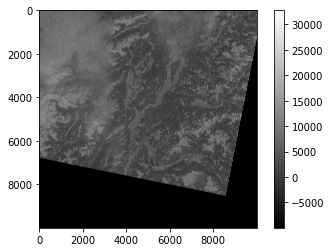

In [22]:
plt.imshow(eodc_force[0], cmap='gray')
plt.colorbar()

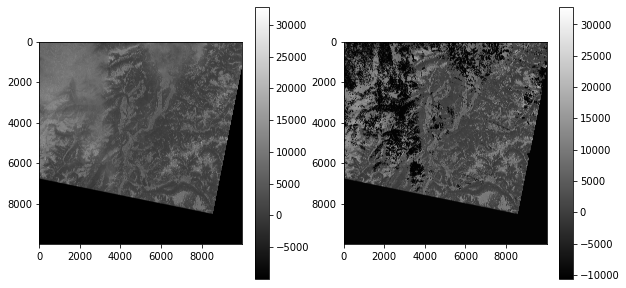

In [54]:
eodc_ard = xr.open_rasterio('./data/OpticalARD/eodc_ard/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif',chunks={})

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(eodc_force[0],cmap='gray')
fig.colorbar(ax1.imshow(eodc_force[0],cmap='gray'), ax = (ax1))
ax2.imshow(eodc_ard[0],cmap='gray')
fig.colorbar(ax2.imshow(eodc_ard[0],cmap='gray'), ax = (ax2))

As in the atmospheric_correction the option for cloud_erase is set to False, the figure on the left still shows clouds. Applying ard_surface_reflectance or atmospheric_correction without additional options removes clouds per default, as shown on the right.

## Step 5 - Look at the metadata


In [42]:
print(metadata_ard)

{'assets': {'20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-0ec67d1a-e889-436c-9c7f-4c13fb5b435e/jr-20211020T133536815176/result/20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif?Expires=1634746864&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=zovVlxqsP9lSLrLbPONmr-jhwbY='}, '20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-0ec67d1a-e889-436c-9c7f-4c13fb5b435e/jr-20211020T133536815176/result/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif?Expires=1634746864&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=bq_Q-SYBUCPcjwG29-WCqsi7FWI='}, '20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-0ec67d1a-e889-436c-9c7f-4c13fb5b435e/jr-20211020T133536815176/result/20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif?Expires=1634746864&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=MMlfcP_cejigbwC6Sb

In [ ]:
print(metadata_ard_options)

In [45]:
print(metadata_topo)

{'assets': {'20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-5f2f302c-5940-4f74-a305-1320c448d92c/jr-20211020T134913307380/result/20210113_LEVEL2_SEN2A_AOD_X0048_Y0041.tif?Expires=1634747227&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=4NWyIXCQTV4kh-LmCZ6WM8iVVSM='}, '20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-5f2f302c-5940-4f74-a305-1320c448d92c/jr-20211020T134913307380/result/20210113_LEVEL2_SEN2A_BOA_X0048_Y0041.tif?Expires=1634747227&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=NXi_8CeeUTz8J3-OoGZc-VukqhE='}, '20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif': {'href': 'https://openeo.eodc.eu/v1.0/downloads/jb-5f2f302c-5940-4f74-a305-1320c448d92c/jr-20211020T134913307380/result/20210113_LEVEL2_SEN2A_DST_X0048_Y0041.tif?Expires=1634747227&KeyName=sign-key-2&UserId=us-d364db44-25f0-414e-83e8-24b3c6fc2e6f&Signature=pi4qObVdaWXWIT3i_X